# Esercizio 01.1

M=10^6 lanci sono suddivisi in N=100 blocchi. 

Il file  <span style="color:red">dati.dat</span> è suddiviso in clonne che corrispondono a: 
0. Numero di lanci
1. Media progressiva dei valori dei blocchi
2. Errore della media dei valori
3. Media progressiva delle varianze dei blocchi
4. Errore della media delle varianze


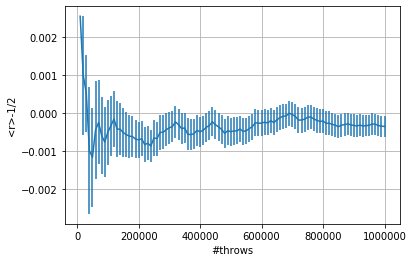

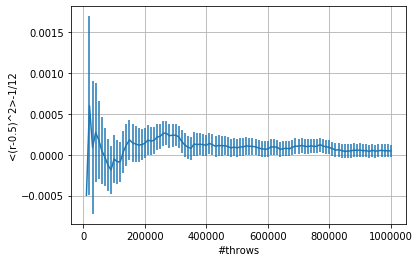

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

data = np.loadtxt("dati.dat")

plt.errorbar(data[:,0],data[:,1]-0.5,yerr=data[:,2])
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

plt.errorbar(data[:,0],data[:,3]-1/12,yerr=data[:,4])
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()



# Test $\chi^2$

Per ognuno degli N blocchi viene effettuato il test $\chi^2$, suddividendo l'intervallo \[0,1) in m=100 sottointervalli. 

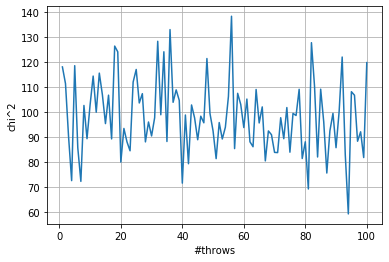

In [10]:
chi2 = np.loadtxt("chi2.dat")

plt.plot(chi2[:,0],chi2[:,1])
plt.xlabel('#throws')
plt.ylabel('chi^2')
plt.grid(True)
plt.show()

# Esercizio 01.2

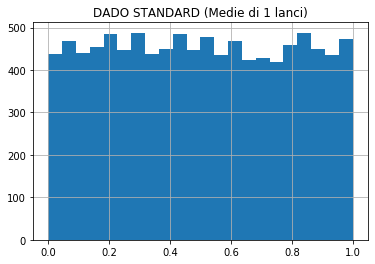

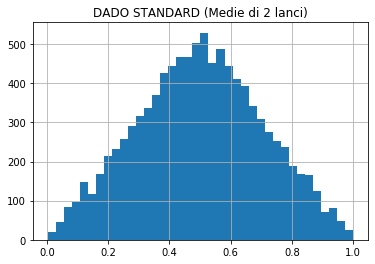

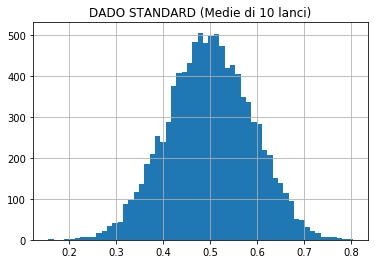

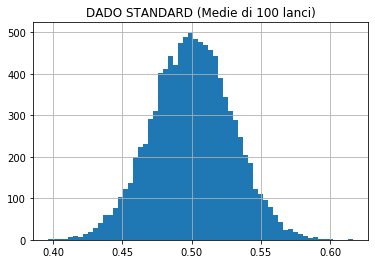

[[ 5.99133761e-02 -5.98229036e-10  3.20586905e-05]
 [-5.98229036e-10  5.14561799e-08 -8.99864466e-13]
 [ 3.20586905e-05 -8.99864466e-13  5.14595221e-08]] [3.60167892e+01 5.00474105e-01 2.89065484e-02]


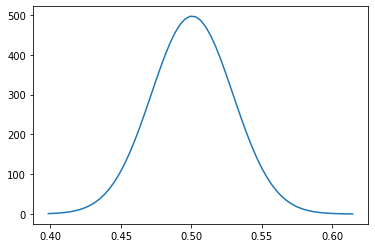

In [12]:
from scipy.optimize import curve_fit

def Gauss(x,norm, mean, dev):
    return (norm/(dev*np.sqrt(2*math.pi))) * np.exp(-(x-mean)**2/(2*dev**2))

dice = np.loadtxt("dice.dat")
N=np.array(["1","2","10","100"])

for i in range(4):
    if i%4==3:
        n,bins,c = plt.hist(dice[:,i], bins='auto')
    else: 
        plt.hist(dice[:,i], bins='auto')
    plt.title("DADO STANDARD (Medie di " + N[i%4] + " lanci)")
    plt.grid(True)
    plt.show()

x = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    x[i] = (bins[i+1]+bins[i])/2

fit_par,fit_cov = curve_fit(Gauss, x, n)
print(fit_cov, fit_par)
plt.plot(x, Gauss(x, fit_par[0], fit_par[1], fit_par[2]))
plt.show()

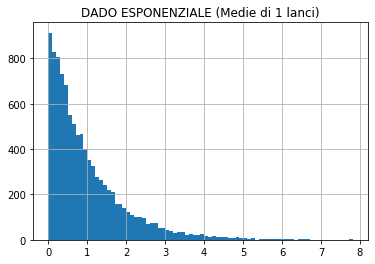

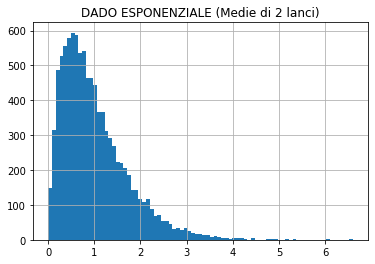

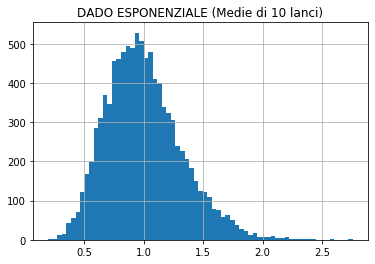

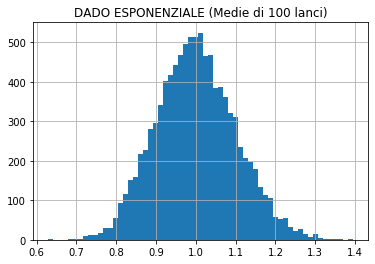

[[ 1.22745105e+00 -7.00277409e-09  6.53852687e-04]
 [-7.00277409e-09  1.04482359e-06 -1.05101913e-11]
 [ 6.53852687e-04 -1.05101913e-11  1.04486849e-06]]


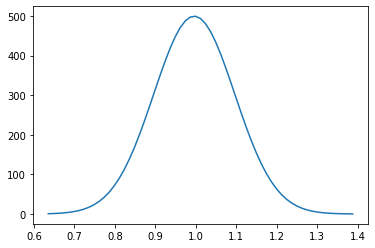

In [13]:
for i in range(4,8):
    if i%4==3:
        n,bins,c = plt.hist(dice[:,i], bins='auto')
    else: 
        plt.hist(dice[:,i], bins='auto')
    plt.title("DADO ESPONENZIALE (Medie di " + N[i%4] + " lanci)")
    plt.grid(True)
    plt.show()
    
x = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    x[i] = (bins[i+1]+bins[i])/2

fit_par,fit_cov = curve_fit(Gauss, x, n)
print(fit_cov)
plt.plot(x, Gauss(x, fit_par[0], fit_par[1], fit_par[2]))
plt.show()

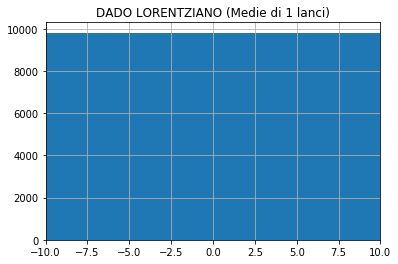

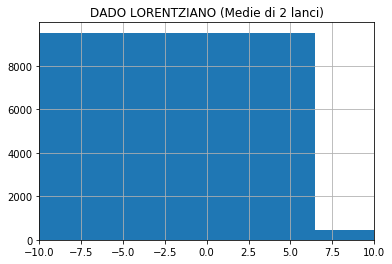

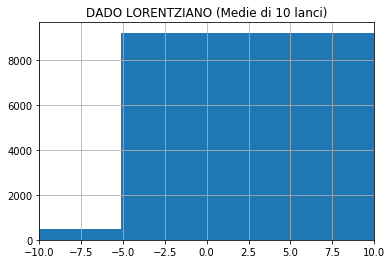

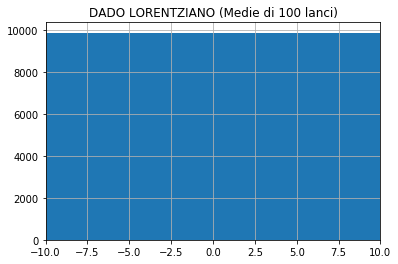

[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


/home/pol/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


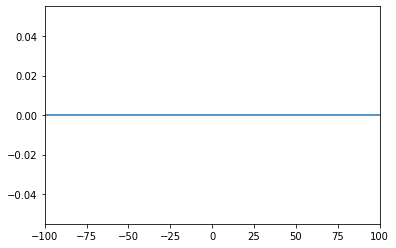

In [17]:
for i in range(8,12):
    if i%4==3:
        n,bins,c = plt.hist(dice[:,i], bins=100)
    else: 
        plt.hist(dice[:,i], bins=100)
    plt.title("DADO LORENTZIANO (Medie di " + N[i%4] + " lanci)")
    plt.xlim((-10,10))
    plt.grid(True)
    plt.show()

x = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    x[i] = (bins[i+1]+bins[i])/2

fit_par,fit_cov = curve_fit(Gauss, x, n)
print(fit_cov)
plt.plot(x, Gauss(x, fit_par[0], fit_par[1], fit_par[2]))
plt.xlim((-100,100))
plt.show()
    

## Esercizio 01.3

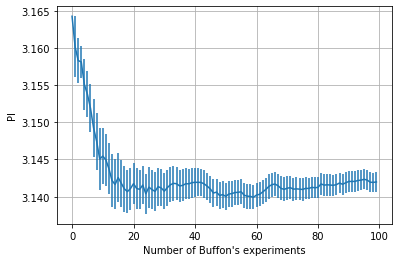

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

pi = np.loadtxt("pi.dat")
nx = np.arange(100)

plt.errorbar(nx[:],pi[:,1],yerr=pi[:,2])
plt.xlabel('Number of Buffon\'s experiments')
plt.ylabel('PI')
plt.grid(True)
plt.show()